<a href="https://colab.research.google.com/github/eaa-msda/Hands-on-Lab-Analyzing-Historical-Stock-Revenue-Data-and-Building-a-Dashboard/blob/main/Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Errol  Ian Ave Acosta
# Python | Jupytyer
# Case Study 1: Cyclistic Bike-Share Analysis
# Google Data Analytics Certificate
# February 8, 2025

In [ ]:
# Step 1: Define the Business Task

# The goal is to analyze how annual members and casual riders use Cyclistic bikes differently.
# This analysis will help Cyclistic's marketing team develop a strategy to convert casual riders into paying members

In [16]:
# Load Libraries and Packages
import pandas as pd
# Load Libraries and Packages
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/Data/Case_Study_1.csv") # <--# CHANGE AS REQUIRED

In [17]:
# Display first (5) rows # (RUN EACH CODE LINE BY LINE)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [18]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84776 non-null  object 
 1   rideable_type       84776 non-null  object 
 2   started_at          84776 non-null  object 
 3   ended_at            84776 non-null  object 
 4   start_station_name  84776 non-null  object 
 5   start_station_id    84776 non-null  int64  
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84677 non-null  float64
 8   start_lat           84776 non-null  float64
 9   start_lng           84776 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84776 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 8.4+ MB


In [19]:
# Summary statistics
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,84776.000000,84677.000000,84776.000000,84776.000000,84677.000000,84677.000000
mean,236.703418,236.978176,41.908156,-87.649319,41.908194,-87.649601
std,160.288883,160.957429,0.043313,0.025170,0.043313,0.025243
min,2.000000,2.000000,41.736600,-87.774700,41.736600,-87.774700
25%,113.000000,113.000000,41.884600,-87.664400,41.884600,-87.665100
50%,211.000000,212.000000,41.903000,-87.646300,41.903000,-87.646600
75%,324.000000,323.000000,41.932600,-87.631700,41.932600,-87.631700
max,673.000000,673.000000,42.064900,-87.549400,42.064900,-87.549400


In [20]:
# Count missing values
df.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,99
end_station_id,99
start_lat,0
start_lng,0


In [ ]:
# Step 3: Data Cleaning & Transformation
# To prepare data for analysis, we clean and transform it.

In [22]:
# Convert Date Columns to Datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
# Create Ride Duration Column
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
# Extract Day of the Week
df['day_of_week'] = df['started_at'].dt.dayofweek
# Filter Out Negative or Zero Ride Length
df = df[df['ride_length'] > 0]

In [23]:
# Step 4: Analyze Usage Patterns

In [24]:
# Syntax: Average Ride Length by User Type
df.groupby('member_casual')['ride_length'].mean()
# Number of Rides by User Type
df['member_casual'].value_counts()
# Number of Rides per Day
df.groupby(['day_of_week', 'member_casual']).size().unstack()

member_casual,casual,member
day_of_week,,
0,2673,8059
1,3654,9148
2,1795,6912
3,2439,9263
4,2508,7458
5,4065,8839
6,6471,11433


In [25]:
# Step 5: Visualize the Findings
# We create visualizations to display the results.

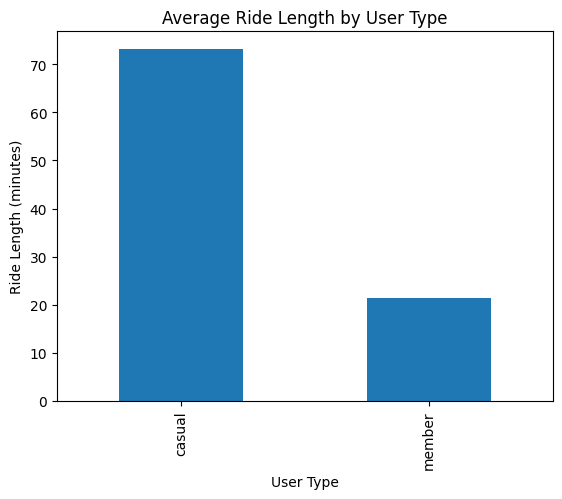

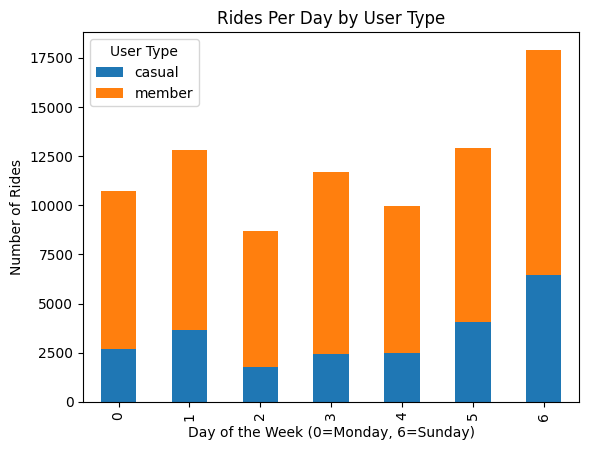

In [26]:
import matplotlib.pyplot as plt
# Ride Duration by User Type
df.groupby('member_casual')['ride_length'].mean().plot(kind='bar')
plt.title('Average Ride Length by User Type')
plt.xlabel('User Type')
plt.ylabel('Ride Length (minutes)')
plt.show()
# Ride Usage by Day of the Week
df.groupby(['day_of_week', 'member_casual']).size().unstack().plot(kind='bar',
stacked=True)
plt.title('Rides Per Day by User Type')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Rides')
plt.legend(title="User Type")
plt.show()

In [ ]:
# Step 6: Report & Recommendations Findings:
# Findings
# 1. Casual riders take longer rides than annual members.
# 2. Casual riders peak on weekends, while members ride more consistently.
# 3. Annual members likely use bikes for commuting, casual riders for leisure

# Recommendations:
# 1. Promote membership benefits with discounts or loyalty rewards.
# 2. Target weekend casual riders with marketing campaigns.
# 3. Use digital media (email, social media, app notifications) for membership promotions.